In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyfpgrowth

     |████████████████████████████████| 1.6MB 5.1MB/s 
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5477 sha256=92239880bdb6fefc584753aeb3f489bd48a233d19cf0198fc8e41a27263b8bc0
  Stored in directory: /root/.cache/pip/wheels/3b/3f/0d/a04bb8b17887c1eca7d0f1a48d4aa0c09c96eb221ff7fa56c1
Successfully built pyfpgrowth


In [ ]:
!pip install pyECLAT

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5977 sha256=5d745810965ac1347148d318af5fecaca9065c7e140b1d1ebff4afe14796bfc2
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
!pip install mlxtend --upgrade --no-deps

     |████████████████████████████████| 1.4MB 5.3MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from apyori import apriori
from pyECLAT import ECLAT
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import davies_bouldin_score
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

In [ ]:
plt.style.use('ggplot')
#plt.style.available

**Importing and Exploring data**

In [ ]:
#importing data 
df = pd.read_table("/content/drive/MyDrive/SouthGermanCredit.asc", sep=" ")

In [ ]:
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


In [ ]:
#changing column names
df.columns = ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex',
              'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable',
              'telephone', 'foreign_worker', 'credit_risk']

In [ ]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


In [ ]:
#statistical summary
df.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [ ]:
#checking null values
df.isnull().sum()
#no null value

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

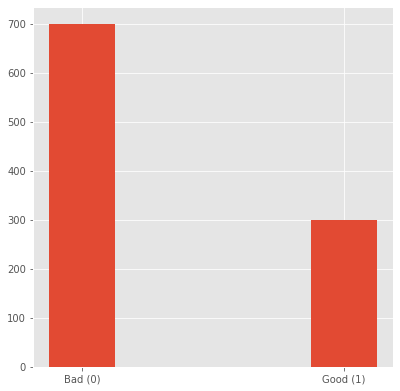

1    700
0    300
Name: credit_risk, dtype: int64


In [ ]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_axes([0,0,1,1])
labels = ['Bad (0)', 'Good (1)']
values = df.credit_risk.value_counts()
ax.bar(labels, values, width = 0.25)
plt.show()
print(values)

**Outliers**

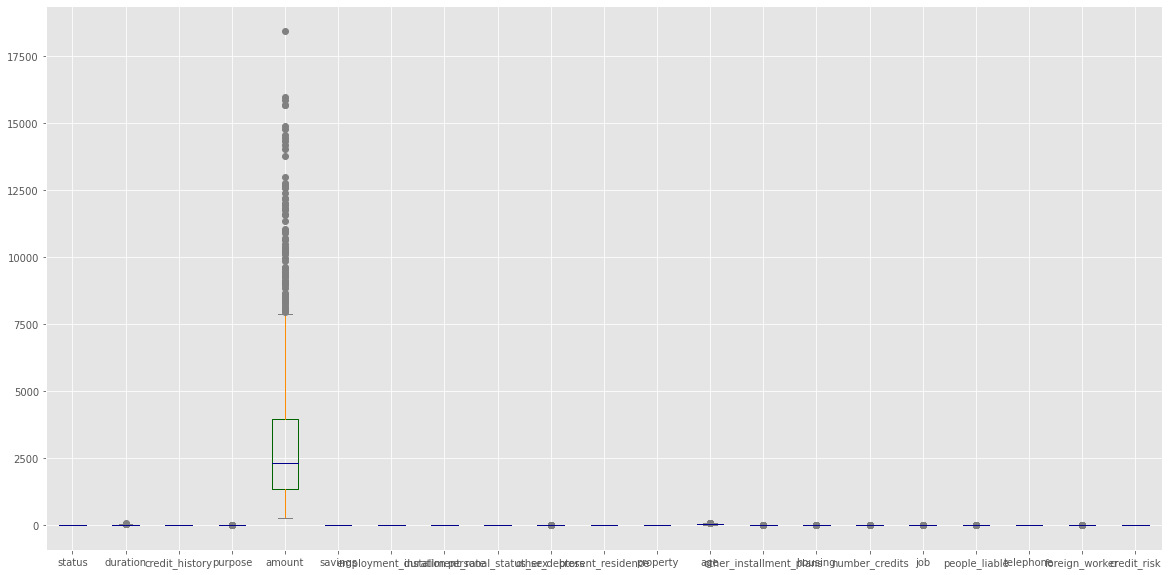

In [ ]:
#visualise outliers - circles are outliers
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}
 

df.plot.box(figsize=(20,10),color=color, sym="grey")
plt.savefig('outliers')

In [ ]:
#calculating z-score to detect outliers, then converting it to dataframe
#z- scores greater than 3 or lower than -3 are outliers
zscore = stats.zscore(df)
scores = pd.DataFrame(zscore)
scores.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-1.254566,-0.240857,1.344014,-0.301852,-0.787657,-0.699707,-1.145978,0.918477,-0.963650,-0.303686,1.046987,-0.341055,-1.281573,0.460831,-1.751205,-0.704926,0.146949,0.428290,-0.823318,0.196014,0.654654
1,-1.254566,-0.987573,1.344014,-1.030963,-0.167384,-0.699707,-0.317959,-0.870183,0.449326,-0.303686,-0.765977,-1.293723,0.040363,0.460831,-1.751205,1.027079,0.146949,-2.334869,-0.823318,0.196014,0.654654
2,-0.459026,-0.738668,-0.503428,2.250036,-0.861381,-0.066488,0.510060,-0.870183,-0.963650,-0.303686,1.046987,-1.293723,-1.105315,0.460831,-1.751205,-0.704926,-1.383771,0.428290,-0.823318,0.196014,0.654654
3,-1.254566,-0.738668,1.344014,-1.030963,-0.407341,-0.699707,-0.317959,0.024147,0.449326,-0.303686,-0.765977,-1.293723,0.304750,0.460831,-1.751205,1.027079,-1.383771,-2.334869,-0.823318,-5.101669,0.654654
4,-1.254566,-0.738668,1.344014,-1.030963,-0.389974,-0.699707,-0.317959,0.918477,0.449326,-0.303686,1.046987,-0.341055,0.216621,-2.375050,0.135869,1.027079,-1.383771,0.428290,-0.823318,-5.101669,0.654654


In [ ]:
# z-score that greater than 4 or lower than -4 is dropped
k = []
for i in range (scores.shape[0]):
  for j in range(len(scores.columns)):
    if scores.iloc[i,j]>4 or scores.iloc[i,j]<-4:
       k.append(i)

scores.drop(index=k, inplace = True)
df.drop(index=k, inplace = True)

In [ ]:
df.reset_index(drop=True, inplace = True)

In [ ]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,4,18,4,3,1098,1,1,4,2,1,4,3,65,3,2,2,1,2,1,2,1
4,2,24,2,3,3758,3,1,1,2,1,4,4,23,3,1,1,1,2,1,2,1


In [ ]:
# other outliers is replaced with lower or upper bound based on Interquartile Range
for i in range (scores.shape[0]):
  for j in range(len(scores.columns)):

    Q1 = df.iloc[:,j].quantile(0.25) #25th percentile
    Q3 = df.iloc[:,j].quantile(0.75) #75th percentile
    IQR = Q3 - Q1

    if df.iloc[i,j] < Q1 - 1.5 * IQR:
        df.iloc[i,j] = Q1 - 1.5 * IQR
    elif df.iloc[i,j] > Q3 + 1.5 * IQR:
        df.iloc[i,j] = Q3 + 1.5 * IQR

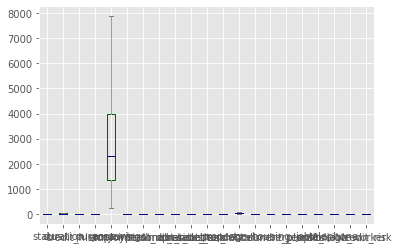

In [ ]:
#checking dataframe again after handling outliers
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}
 

df.plot.box(color=color, sym="grey")
#there is no outlier anymore

In [ ]:
df.count()

status                     950
duration                   950
credit_history             950
purpose                    950
amount                     950
savings                    950
employment_duration        950
installment_rate           950
personal_status_sex        950
other_debtors              950
present_residence          950
property                   950
age                        950
other_installment_plans    950
housing                    950
number_credits             950
job                        950
people_liable              950
telephone                  950
foreign_worker             950
credit_risk                950
dtype: int64

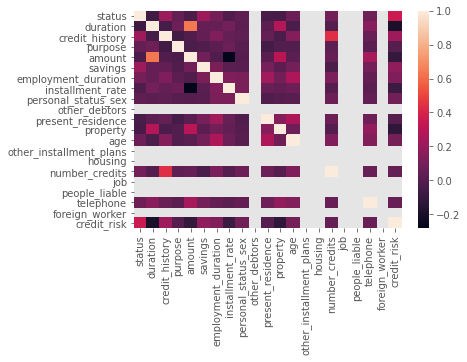

In [ ]:
sns.heatmap(df.corr(), xticklabels=df.columns, yticklabels=df.columns)

In [ ]:
df[df.columns[0:]].corr()['credit_risk'][:-1]

status                     0.357113
duration                  -0.194125
credit_history             0.225963
purpose                    0.006894
amount                    -0.104788
savings                    0.175569
employment_duration        0.128934
installment_rate          -0.078590
personal_status_sex        0.084183
other_debtors                   NaN
present_residence          0.006166
property                  -0.123304
age                        0.101150
other_installment_plans         NaN
housing                         NaN
number_credits             0.049556
job                             NaN
people_liable                   NaN
telephone                  0.059275
foreign_worker                  NaN
Name: credit_risk, dtype: float64

In [ ]:
dftt=df

In [ ]:
df = df.drop(columns = ['foreign_worker','people_liable','job','housing','other_installment_plans','other_debtors','purpose','present_residence'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f216479fa58>]],
      dtype=object)

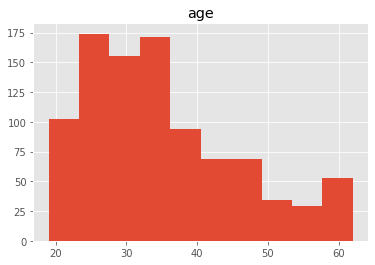

In [ ]:
df.hist(column='age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2164678d68>]],
      dtype=object)

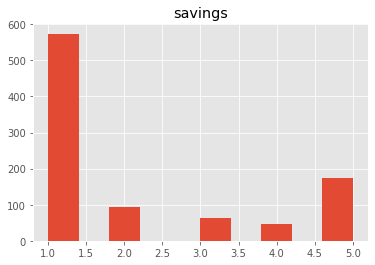

In [ ]:
df.hist(column='savings')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2164a41c18>]],
      dtype=object)

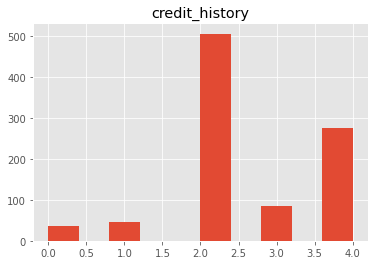

In [ ]:
df.hist(column='credit_history')

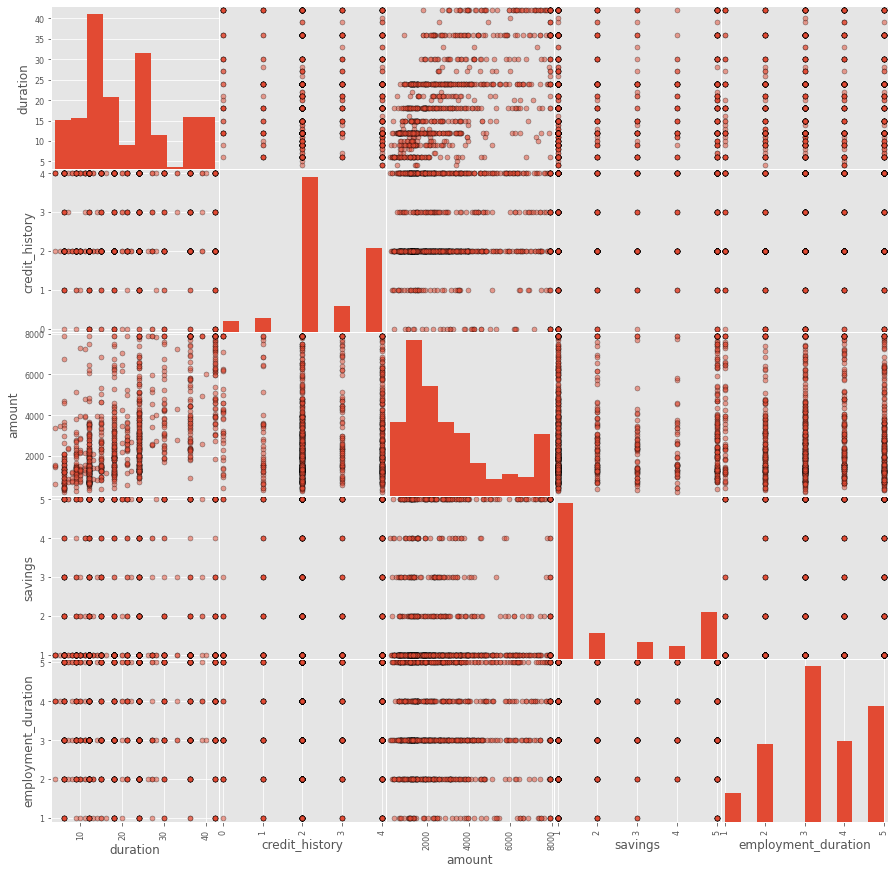

In [ ]:
#top 5 corrolated features
top_corr = list(df.corr().index[1:6])
top_corr = scatter_matrix(df[top_corr],  figsize=[15,15], diagonal='hist', alpha=0.5, s=100, edgecolor ='black')
plt.show()

### **Frequent Pattern Mining**

**Apriori**

In [ ]:
dft=dftt
t_status = {1:'no checking account',
            2:'<0 DM',
            3:'>0<200 DM',
            4:'> 200DM/at least 1 year salary'}

t_credit_history={0:"delay in paying off in the past", 
                  1:"critical account/other credits elsewhere",
                  2:"no credits taken/all credits paid back duly",
                  3:"existing credits paid back duly till now",
                  4:"all credits at this bank paid back duly"}

t_purpose={0:"others", 
          1:"new car",
          2:"used car",
          3:"furniture/equipment",
          4:"radio/television",
          5:"domestic appliances", 
          6:"repairs",
          7:"education",
          8:"vacation",
          9:"retraining",
          10:"business"}
        
t_savings={1:"unknown/no savings account",2:"... < 100 DM savings",3:"100<=...<500DM savings", 4:"500<=...<1000DM savings",5:"... >= 1000 DM savings"}
t_emp_duration={1:"unemployed",2:"< 1yr employed", 3:"1<=... <4yrs employed", 4:"4<=... <7yrs employed",5:">=7yrs employed"}
t_ins_rate={1:">= 35 installment rate" ,2:"25 <= ... <35 installment rate",3:"20 <= ... <25 installment rate",4:"<20 installment rate"}
tps={1:"male : divorced/separated",2:"female : non-single or male : single",3:"male : married/widowed",4:"female : single"}
tod={1:"none",2:"co-applicant",3:"guarantor"}
tpresidence={1:"< 1 yr 1", 2:"<=... <4yrs", 3:"4<=... <7yrs", 4: ">=7yrs"}
t_property={1:"unknown / no property ",2: "car or other",3:"building soc. savings agr./life insurance",4: "real estate"}
toi_plans={1:"bank",2:"stores", 3:"none"}
t_housing={1:"for free", 2:"rent",3:"own"}
t_number_credits={1:"1 credit",2:"2-3 credit", 3:"4-5 credit",4:">=6 credit"}
t_job={1:"unemployed/unskilled - non-resident",2:"unskilled - resident", 3:"skilled employee/official", 4:"manager/self-empl./highly qualif. employee"}
t_people_liable={1:"3 or more",2:"0 to 2"}
t_telephone={1:"no people liable",2:"people liable(under customer name)"}
t_foreign={1:"foreign",2:"non foreign"}


dft.replace({"status": t_status},inplace=True)
dft.replace({"credit_history": t_credit_history},inplace=True)
dft.replace({"purpose": t_purpose},inplace=True)
dft.replace({"savings": t_savings},inplace=True)
dft.replace({"employment_duration": t_emp_duration},inplace=True)
dft.replace({"installment_rate": t_ins_rate},inplace=True)
dft.replace({"personal_status_sex": tps},inplace=True)
dft.replace({"other_debtors": tod},inplace=True)
dft.replace({"present_residence": tpresidence},inplace=True)
dft.replace({"property": t_property},inplace=True)
dft.replace({"other_installment_plans": toi_plans},inplace=True)
dft.replace({"housing": t_housing},inplace=True)
dft.replace({"number_credits": t_number_credits},inplace=True)
dft.replace({"job": t_job},inplace=True)
dft.replace({"people_liable": t_people_liable},inplace=True)
dft.replace({"telephone": t_telephone},inplace=True)
dft.replace({"foreign_worker": t_foreign},inplace=True)

In [ ]:
dft_test = dft
dft_test['duration'] = dft_test['duration'].astype('object')
dft_test['amount'] = dft_test['amount'].astype('object')
dft_test['age'] = dft_test['age'].astype('object')
dft_test['credit_risk'] = dft_test['credit_risk'].astype('object')

In [ ]:
dft_test = dft_test.astype('object')

In [ ]:
dft_test.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,used car,1049,unknown/no savings account,< 1yr employed,<20 installment rate,female : non-single or male : single,none,>=7yrs,car or other,21,none,rent,1 credit,skilled employee/official,0 to 2,no people liable,non foreign,1
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1<=... <4yrs employed,25 <= ... <35 installment rate,male : married/widowed,none,<=... <4yrs,unknown / no property,36,none,rent,2-3 credit,skilled employee/official,0 to 2,no people liable,non foreign,1
2,<0 DM,12,no credits taken/all credits paid back duly,repairs,841,... < 100 DM savings,4<=... <7yrs employed,25 <= ... <35 installment rate,female : non-single or male : single,none,>=7yrs,unknown / no property,23,none,rent,1 credit,skilled employee/official,0 to 2,no people liable,non foreign,1
3,> 200DM/at least 1 year salary,18,all credits at this bank paid back duly,furniture/equipment,1098,unknown/no savings account,unemployed,<20 installment rate,female : non-single or male : single,none,>=7yrs,building soc. savings agr./life insurance,62,none,rent,2-3 credit,skilled employee/official,0 to 2,no people liable,non foreign,1
4,<0 DM,24,no credits taken/all credits paid back duly,furniture/equipment,3758,100<=...<500DM savings,unemployed,>= 35 installment rate,female : non-single or male : single,none,>=7yrs,real estate,23,none,rent,1 credit,skilled employee/official,0 to 2,no people liable,non foreign,1


In [ ]:
badcredit=dft_test.loc[dft_test['credit_risk'] == 0]
goodcredit=dft_test.loc[dft_test['credit_risk']== 1]

In [ ]:
#Creating Transactions for only Good Credit
good_trs=[]
for i in range(0, len(goodcredit)):
  good_trs.append([str(goodcredit.values[i, j]) for j in range(0, 20)])  

In [ ]:
#Creating Transaction for only Bad Credit
bad_trs=[]
for i in range(0, len(badcredit)):
  bad_trs.append([str(badcredit.values[i, j]) for j in range(0, 20)])  

In [ ]:
transactions=[]
for i in range(0, len(dft_test)):
  transactions.append([str(dft_test.values[i, j]) for j in range(0, 21)])  

In [ ]:
#Frequent Patterns for Good Credit -APRIORI
GCrules = apriori(good_trs, min_support = 0.5, min_confidence = 0.2, max_length=3)
GCresults = list(GCrules)
GCresults = pd.DataFrame(GCresults)
GCresults.sort_values('support',ascending=False)

,items,support,ordered_statistics
0,(0 to 2),1.000000,"[((), (0 to 2), 1.0, 1.0)]"
72,"(rent, 0 to 2, non foreign)",1.000000,"[((), (rent, 0 to 2, non foreign), 1.0, 1.0), ..."
41,"(none, non foreign)",1.000000,"[((), (none, non foreign), 1.0, 1.0), ((non fo..."
45,"(none, rent)",1.000000,"[((), (none, rent), 1.0, 1.0), ((none), (rent)..."
46,"(none, skilled employee/official)",1.000000,"[((), (none, skilled employee/official), 1.0, ..."
...,...,...,...
88,"(rent, > 200DM/at least 1 year salary, non for...",0.503782,"[((), (rent, > 200DM/at least 1 year salary, n..."
89,"(> 200DM/at least 1 year salary, skilled emplo...",0.503782,"[((), (> 200DM/at least 1 year salary, skilled..."
90,"(none, rent, > 200DM/at least 1 year salary)",0.503782,"[((), (none, rent, > 200DM/at least 1 year sal..."
91,"(none, > 200DM/at least 1 year salary, skilled...",0.503782,"[((), (none, > 200DM/at least 1 year salary, s..."


In [ ]:
#Frequent Patterns for Bad Credit - APRIORI
BCrules = apriori(bad_trs, min_support = 0.3, min_confidence = 0.2, max_length=3)
BCresults = list(BCrules)
BCresults = pd.DataFrame(BCresults)
BCresults.sort_values('support',ascending=False)

,items,support,ordered_statistics
0,(0 to 2),1.000000,"[((), (0 to 2), 1.0, 1.0)]"
17,(rent),1.000000,"[((), (rent), 1.0, 1.0)]"
36,"(rent, 0 to 2)",1.000000,"[((), (rent, 0 to 2), 1.0, 1.0), ((0 to 2), (r..."
108,"(rent, non foreign)",1.000000,"[((), (rent, non foreign), 1.0, 1.0), ((non fo..."
34,"(none, 0 to 2)",1.000000,"[((), (none, 0 to 2), 1.0, 1.0), ((0 to 2), (n..."
...,...,...,...
278,"(unknown/no savings account, >=7yrs, none)",0.301038,"[((), (unknown/no savings account, >=7yrs, non..."
280,"(unknown/no savings account, >=7yrs, rent)",0.301038,"[((), (unknown/no savings account, >=7yrs, ren..."
281,"(unknown/no savings account, >=7yrs, skilled e...",0.301038,"[((), (unknown/no savings account, >=7yrs, ski..."
75,"(unknown/no savings account, >=7yrs)",0.301038,"[((), (unknown/no savings account, >=7yrs), 0...."


In [ ]:
#RULES FOR ALL DATASET - APRIORI
rules = apriori(transactions, min_support = 0.3, min_confidence = 0.2, max_length=3)
results = list(rules)
results = pd.DataFrame(results)
results

,items,support,ordered_statistics
0,(0),0.304211,"[((), (0), 0.3042105263157895, 1.0)]"
1,(0 to 2),1.000000,"[((), (0 to 2), 1.0, 1.0)]"
2,(1),0.695789,"[((), (1), 0.6957894736842105, 1.0)]"
3,(1 credit),0.634737,"[((), (1 credit), 0.6347368421052632, 1.0)]"
4,(1<=... <4yrs employed),0.338947,"[((), (1<=... <4yrs employed), 0.3389473684210..."
...,...,...,...
374,"(none, rent, skilled employee/official)",1.000000,"[((), (none, rent, skilled employee/official),..."
375,"(unknown/no savings account, none, rent)",0.604211,"[((), (unknown/no savings account, none, rent)..."
376,"(unknown/no savings account, none, skilled emp...",0.604211,"[((), (unknown/no savings account, none, skill..."
377,"(people liable(under customer name), rent, ski...",0.407368,"[((), (people liable(under customer name), ren..."


**ECLAT**

In [ ]:
#FP FOR GOOD CREDIT - ECLAT
g_tr=pd.DataFrame(good_trs)
eclat_instance_good_tr = ECLAT(data=g_tr, verbose=True) #verbose=True to see the loading bar

100%|██████████| 703/703 [00:00<00:00, 3262.70it/s]


In [ ]:
get_ECLAT_indexes_good_credit, get_ECLAT_supports_good_credit = eclat_instance_good_tr.fit(min_support=0.3,
                                                           min_combination=1,
                                                           max_combination=3,
                                                           separator=' & ',
                                                           verbose=True)
good_sprts=get_ECLAT_supports_good_credit
rules_gc=good_sprts.items()

2it [00:00, 17.00it/s]

Combination 1 by 1


20it [00:01, 18.32it/s]
2it [00:00, 18.32it/s]

Combination 2 by 2


190it [00:07, 24.54it/s]
2it [00:00, 18.08it/s]

Combination 3 by 3


1140it [00:37, 30.02it/s]


In [ ]:
pd.DataFrame(rules_gc, columns=['items','support']).sort_values('support',ascending=False)

,items,support
0,skilled employee/official,1.000000
56,non foreign & none,1.000000
1,non foreign,1.000000
157,skilled employee/official & 0 to 2 & rent,1.000000
160,skilled employee/official & 0 to 2 & none,1.000000
...,...,...
297,no people liable & male : married/widowed & none,0.301059
295,no people liable & rent & male : married/widowed,0.301059
91,no people liable & male : married/widowed,0.301059
164,skilled employee/official & no people liable &...,0.301059


In [ ]:
# FP FOR BAD CREDIT - ECLAT
b_tr=pd.DataFrame(bad_trs)
eclat_instance_bad_tr = ECLAT(data=b_tr) #verbose=True to see the loading bar
get_ECLAT_indexes_bad_credit, get_ECLAT_supports_bad_credit = eclat_instance_bad_tr.fit(min_support=0.3,
                                                           min_combination=1,
                                                           max_combination=3,
                                                           separator=' & ')
bad_sprts=get_ECLAT_supports_bad_credit
rules_bc=bad_sprts.items()

4it [00:00, 32.37it/s]

Combination 1 by 1


20it [00:00, 32.29it/s]
3it [00:00, 29.89it/s]

Combination 2 by 2


190it [00:04, 39.99it/s]
3it [00:00, 29.23it/s]

Combination 3 by 3


1140it [00:23, 48.00it/s]


In [ ]:
pd.DataFrame(rules_bc, columns=['items','support']).sort_values('support',ascending=False)

,items,support
0,skilled employee/official,1.000000
15,rent,1.000000
34,skilled employee/official & rent,1.000000
52,non foreign & rent,1.000000
55,non foreign & none,1.000000
...,...,...
312,0 to 2 & unknown/no savings account & >=7yrs,0.301038
181,skilled employee/official & unknown/no savings...,0.301038
345,unknown/no savings account & >=7yrs & none,0.301038
344,unknown/no savings account & >=7yrs & rent,0.301038


In [ ]:
tr=pd.DataFrame(transactions)
eclat_instance = ECLAT(data=tr, verbose=True) #verbose=True to see the loading bar

100%|██████████| 931/931 [00:00<00:00, 3276.81it/s]


In [ ]:
get_ECLAT_indexes, get_ECLAT_supports = eclat_instance.fit(min_support=0.3,
                                                           min_combination=1,
                                                           max_combination=3,
                                                           separator=' & ',
                                                           verbose=True)

2it [00:00, 14.88it/s]

Combination 1 by 1


21it [00:01, 14.45it/s]
2it [00:00, 13.88it/s]

Combination 2 by 2


210it [00:11, 18.84it/s]
2it [00:00, 14.13it/s]

Combination 3 by 3


1330it [00:56, 23.50it/s]


In [ ]:
pd.DataFrame(get_ECLAT_supports.items(),columns=['items','support']).sort_values('support',ascending=False)

,items,support
0,skilled employee/official,1.000000
1,non foreign,1.000000
37,skilled employee/official & rent,1.000000
40,skilled employee/official & none,1.000000
246,non foreign & 0 to 2 & none,1.000000
...,...,...
155,skilled employee/official & 0 & 0 to 2,0.304211
128,skilled employee/official & non foreign & 0,0.304211
42,non foreign & 0,0.304211
305,0 & rent & none,0.304211


## FPGROWTH

In [ ]:
# transform into the right format
te = TransactionEncoder()
te_good = te.fit(good_trs).transform(good_trs)
fp_good = pd.DataFrame(te_good, columns=te.columns_)

te_bad = te.fit(bad_trs).transform(bad_trs)
fp_bad = pd.DataFrame(te_bad, columns=te.columns_)

In [ ]:
# fp for good credidt - FPGrowth
# at least 30% support
fpgrowth(fp_good, min_support=0.3,max_len=3, use_colnames=True)

,support,itemsets
0,1.000000,(0 to 2)
1,1.000000,(skilled employee/official)
2,1.000000,(rent)
3,1.000000,(none)
4,1.000000,(non foreign)
...,...,...
302,0.426626,"(none, skilled employee/official, people liabl..."
303,0.426626,"(none, 0 to 2, people liable(under customer na..."
304,0.426626,"(rent, skilled employee/official, people liabl..."
305,0.426626,"(rent, 0 to 2, people liable(under customer na..."


In [ ]:
# fp for bad credidt - FPGrowth
# at least 30% support
fpgrowth(fp_bad, min_support=0.3,max_len=3, use_colnames=True)

,support,itemsets
0,1.000000,(0 to 2)
1,1.000000,(non foreign)
2,1.000000,(rent)
3,1.000000,(skilled employee/official)
4,1.000000,(none)
...,...,...
353,0.404844,"(>=7yrs, rent, 0 to 2)"
354,0.301038,"(unknown/no savings account, >=7yrs, rent)"
355,0.404844,"(>=7yrs, 0 to 2, non foreign)"
356,0.301038,"(unknown/no savings account, >=7yrs, non foreign)"


### **Clustering**

KMeans

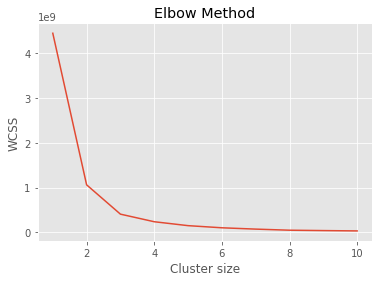

In [ ]:
# Elbow method to determine K
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster size')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(df)

In [ ]:
y_means

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [ ]:
# Let's check clusters for status and amount
X = df.iloc[:, [0,3]].values

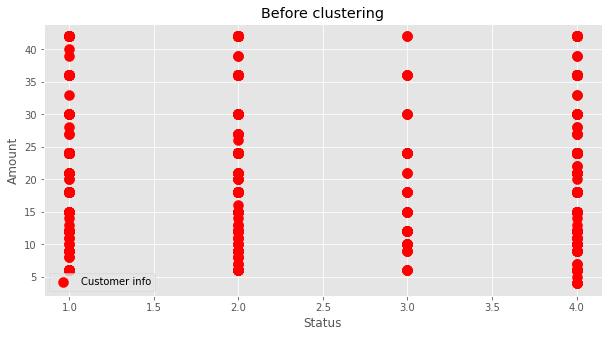

In [ ]:
# before clustering
fig = plt.figure(figsize=(10,5))
plt.scatter(df.values[:,0], df.values[:,1], s=100, c ='red', label = 'Customer info')

plt.title('Before clustering')
plt.xlabel('Status')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(X)

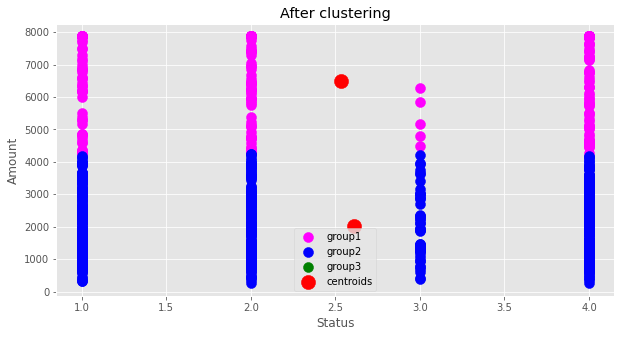

In [ ]:
#Lets plot those clusters
fig = plt.figure(figsize=(10,5))

plt.scatter(X[y_means==0,0], X[y_means==0,1], s=100, c ='magenta', label='group1')
plt.scatter(X[y_means==1,0], X[y_means==1,1], s=100, c= 'blue', label='group2')
plt.scatter(X[y_means==2,0], X[y_means==2,1], s=100, c = 'green', label = 'group3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', label = 'centroids')

plt.title('After clustering')
plt.xlabel('Status')
plt.ylabel('Amount')

plt.legend()
plt.show()

In [ ]:
#Feature Scaling for PCA
scaler = StandardScaler()
sc_df = scaler.fit_transform(df)

In [ ]:
pca = PCA()
pca.fit(sc_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'cumulative explained variance')

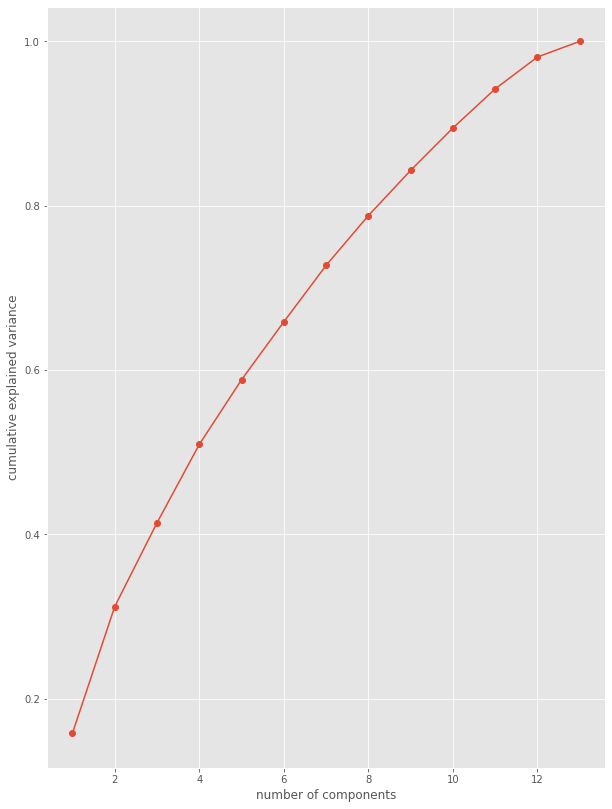

In [ ]:
# cumilative variance plot to decide the numbers of dimension
# A rule of thumb is to preserve around 80 % of the variance - in our case we need 9 components
plt.figure(figsize=(10, 14))
plt.plot(range(1,14), pca.explained_variance_ratio_.cumsum(), marker = 'o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
pca = PCA(n_components=9)
pca.fit_transform(sc_df)
scores_pca = pca.transform(sc_df)

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(scores_pca)

In [ ]:
# creating new dataframe that contains original dataframe, pca scores and label of the clusters
df_kmeans = pd.concat([df.reset_index(drop=True),pd.DataFrame(scores_pca)], axis=1)
df_kmeans.columns.values[-9:] = ['component1', 'component2', 'component3', 'component4', 'component5', 'component6', 'component7', 'component8', 'component9']
df_kmeans['group'] = y_means
df_kmeans.head()

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,personal_status_sex,property,age,number_credits,telephone,credit_risk,component1,component2,component3,component4,component5,component6,component7,component8,component9,group
0,1,18.0,4,1049.0,1,2,4,2,2,21.0,1,1,1,-0.816478,-1.673227,-0.191824,0.888410,-0.338341,1.330565,0.355002,-0.423826,-0.295942,1
1,1,9.0,4,2799.0,1,3,2,3,1,36.0,2,1,1,-1.532237,-0.382361,0.130500,2.116968,-0.176154,-1.071782,-0.485821,0.836006,0.081845,2
2,2,12.0,2,841.0,2,4,2,2,1,23.0,1,1,1,-1.324625,-1.773037,0.967533,-0.256336,0.349337,-0.154068,-0.844229,-0.009065,-0.514930,1
3,4,18.0,4,1098.0,1,1,4,2,3,62.0,2,1,1,-1.523778,0.848703,-0.374189,1.335615,1.308898,1.139573,0.890795,-0.738411,0.218060,2
4,2,24.0,2,3758.0,3,1,1,2,4,23.0,1,1,1,1.309148,-1.275822,2.373722,0.137826,0.124730,0.373030,-0.114331,-0.863728,1.574127,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


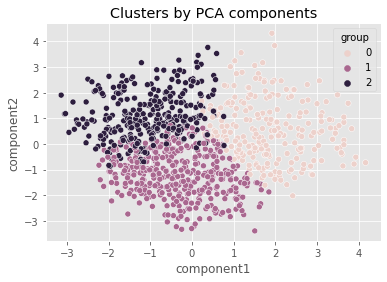

In [ ]:
# plot data by the 1st 2 PCA components
x_axis = df_kmeans['component1']
y_axis = df_kmeans['component2']
#plt.figure(figsize=(10,5))
sns.scatterplot(x_axis, y_axis, hue = df_kmeans['group'])
plt.title('Clusters by PCA components')
plt.show()

DBSCAN

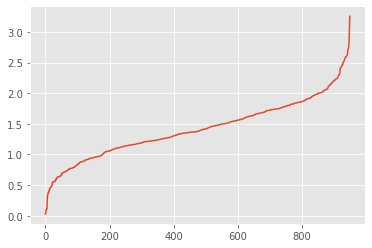

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scores_pca)
distances, indices = nbrs.kneighbors(scores_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
#USING THE MAXIMUM CURVEATURE TO DECIDE THE OPTIMAL EPS

In [ ]:
def unique(list1): 
  unique_list = [] 
  for x in list1: 
      if x not in unique_list: 
          unique_list.append(x)
  return unique_list

In [ ]:
nclus=[]
for i in range(2,30):
  db=DBSCAN(eps=2.0, min_samples=i).fit(scores_pca)
  print("min_samples=",i,unique(db.labels_))
  # nclus.append(len(unique(db.labels_)))

# plt.plot(range(1,10),nclus)
# plt.xlabel("Min samples")
# plt.ylabel("Number of Clusters")


min_samples= 2 [0, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
min_samples= 3 [0, -1, 4, 3, 1, 2, 5]
min_samples= 4 [0, -1, 1, 2, 4, 3]
min_samples= 5 [0, -1, 1]
min_samples= 6 [0, -1, 1]
min_samples= 7 [0, -1, 1]
min_samples= 8 [0, -1, 1]
min_samples= 9 [0, -1, 1]
min_samples= 10 [0, -1]
min_samples= 11 [0, -1]
min_samples= 12 [0, -1, 1]
min_samples= 13 [0, -1, 1]
min_samples= 14 [0, -1]
min_samples= 15 [0, -1]
min_samples= 16 [0, -1]
min_samples= 17 [0, -1, 1]
min_samples= 18 [0, -1]
min_samples= 19 [0, -1]
min_samples= 20 [0, -1]
min_samples= 21 [0, -1]
min_samples= 22 [0, -1]
min_samples= 23 [0, -1]
min_samples= 24 [0, -1]
min_samples= 25 [0, -1]
min_samples= 26 [0, -1]
min_samples= 27 [0, -1]
min_samples= 28 [0, -1]
min_samples= 29 [0, -1]


In [ ]:
dbs=DBSCAN(eps=2.0, min_samples=4).fit(scores_pca)
dbs.labels_

array([ 0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0

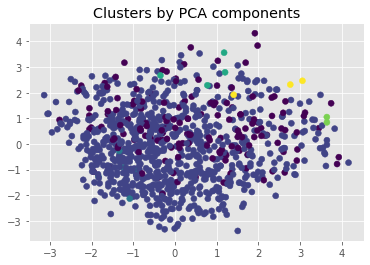

In [ ]:
x_axis = df_kmeans['component1']
y_axis = df_kmeans['component2']
#plt.figure(figsize=(10,14))
plt.scatter(x_axis, y_axis, c = dbs.labels_)
plt.title('Clusters by PCA components')
plt.show()


In [ ]:
print("KMEANS:-",davies_bouldin_score(scores_pca,y_means))
print("DBSCAN:-",davies_bouldin_score(scores_pca,dbs.labels_))

KMEANS:- 2.1405064495000152
DBSCAN:- 2.3773978040908035
